In [3]:
import pandas as pd
import numpy as np


def topsis(data, weight=None):
    """

    TOPSIS algorithm

    Args:
        data: Features
        weight:

    Returns:
        Result:
        Z:
        weight:

    """
    # normalized
    data = data / np.sqrt((data ** 2).sum())
    # best and worst solution
    Z = pd.DataFrame([data.min(), data.max()], index=['负理想解', '正理想解'])

    Result = data.copy()
    Result['正理想解'] = np.sqrt(((data - Z.loc['正理想解']) ** 2 * weight).sum(axis=1))
    Result['负理想解'] = np.sqrt(((data - Z.loc['负理想解']) ** 2 * weight).sum(axis=1))

    # composite score index
    Result['综合得分指数'] = Result['负理想解'] / (Result['负理想解'] + Result['正理想解'])
    Result['排序'] = Result.rank(ascending=False)['综合得分指数']

    return Result, Z, weight


weight = [0.02747,
          0.01077,
          0.30663,
          0.01497,
          0.01054,
          0.01741,
          0.30008,
          0.30008,
          0.01205]
data = pd.read_excel(r"D:\Users\th\Downloads\B题_政策效果的量化数据.xlsx")  #The path and the name of the file
data = data.set_index('政策')
Result, Z, weight = topsis(data, weight)
res = Result.iloc[:, -4:-1]
res

,正理想解,负理想解,综合得分指数
政策,,,
1,0.102596,0.061877,0.376214
2,0.098303,0.064716,0.396985
3,0.089660,0.069716,0.437430
4,0.081144,0.085669,0.513562
5,0.092589,0.070851,0.433499
6,0.087291,0.082067,0.484577
7,0.087187,0.070866,0.448370
8,0.071547,0.096104,0.573238
9,0.104013,0.059627,0.364380


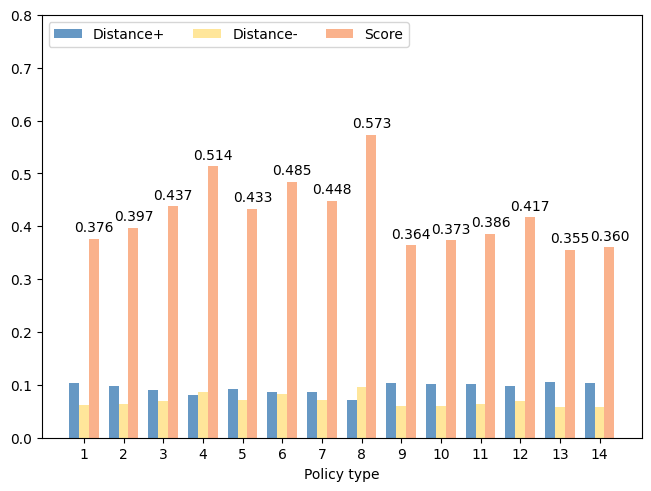

In [4]:
import matplotlib.pyplot as plt
import numpy as np

species = res.index.to_list()
penguin_means = {
    'Distance+': res['正理想解'].to_list(),
    'Distance-': res['负理想解'].to_list(),
    'Score': res['综合得分指数'].to_list(),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True)

# Distance+
offset = width * multiplier
rects = ax.bar(x + offset, list(penguin_means.items())[multiplier][1], width,
               label=list(penguin_means.items())[multiplier][0], color='#6698c4')
multiplier += 1

# Distance-
offset = width * multiplier
rects = ax.bar(x + offset, list(penguin_means.items())[multiplier][1], width,
               label=list(penguin_means.items())[multiplier][0], color='#ffe69a')
multiplier += 1

# Score
offset = width * multiplier
rects = ax.bar(x + offset, list(penguin_means.items())[multiplier][1], width,
               label=list(penguin_means.items())[multiplier][0], color='#fab28c')
ax.bar_label(rects, padding=3, fmt='%.3lf')
multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.8)
ax.set_xlabel('Policy type')

plt.savefig('topsis.svg')
plt.show()